# 📊 Predicting Facebook Post Engagement for a Cosmetics Brand

## 🧠 Project Overview

This project explores and models a dataset of Facebook posts from a cosmetics brand, with the goal of **predicting the total number of interactions** (likes, shares, comments, etc.) a post may receive based on various post features.

Using Python and machine learning techniques, we apply a **linear regression model** to identify key patterns and assess how well we can estimate engagement levels from the available data.

## 🎯 Objectives

- Perform an **Exploratory Data Analysis (EDA)** to understand data structure and key trends.
- Build a **linear regression model** using `scikit-learn`.
- Evaluate the model using metrics such as **Mean Squared Error (MSE)** and **R² Score**.
- Visualize model performance and provide **recommendations for improvement**.

## 🛠️ Tools & Libraries

- `pandas`, `numpy` – data handling and numerical operations  
- `matplotlib`, `seaborn` – visualization and EDA  
- `scikit-learn` – model building and evaluation  

This project serves as a foundational exercise in applying regression analysis to social media data, reinforcing concepts such as feature-target relationships, model evaluation, and prediction accuracy.

(500, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 15 columns):
 #   Column                                                               Non-Null Count  Dtype
---  ------                                                               --------------  -----
 0   Page total likes                                                     500 non-null    int64
 1   Category                                                             500 non-null    int64
 2   Post Month                                                           500 non-null    int64
 3   Post Weekday                                                         500 non-null    int64
 4   Post Hour                                                            500 non-null    int64
 5   Paid                                                                 500 non-null    int64
 6   Lifetime Post Total Reach                                            500 non-null    int64
 7   Lifetime Post To

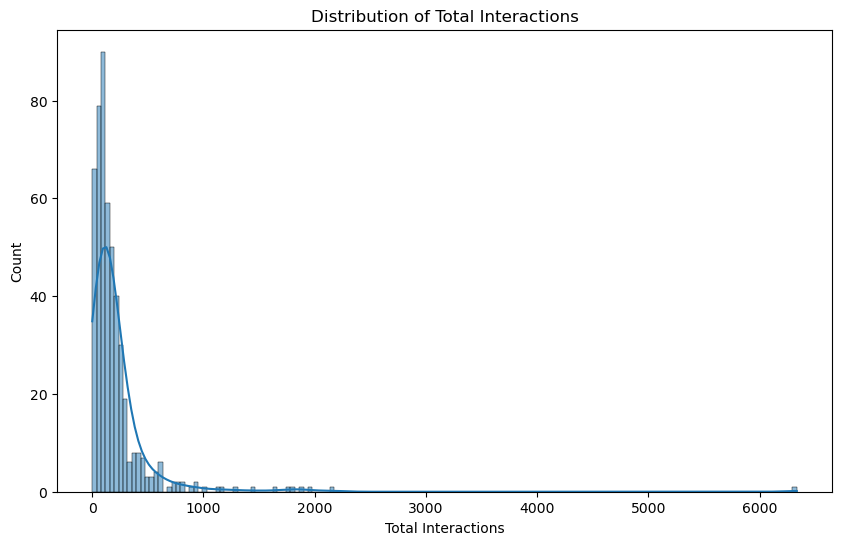

Correlation with Total Interactions:
 Total Interactions                                                     1.000000
Lifetime Post reach by people who like your Page                       0.617929
Lifetime Engaged Users                                                 0.572159
Lifetime Post Total Reach                                              0.538597
Lifetime People who have liked your Page and engaged with your post    0.492570
Lifetime Post Consumers                                                0.354502
Lifetime Post Total Impressions                                        0.343358
Lifetime Post Impressions by people who have liked your Page           0.250083
Lifetime Post Consumptions                                             0.238082
Category                                                               0.127307
Paid                                                                   0.107996
Page total likes                                                       0.045231
Po

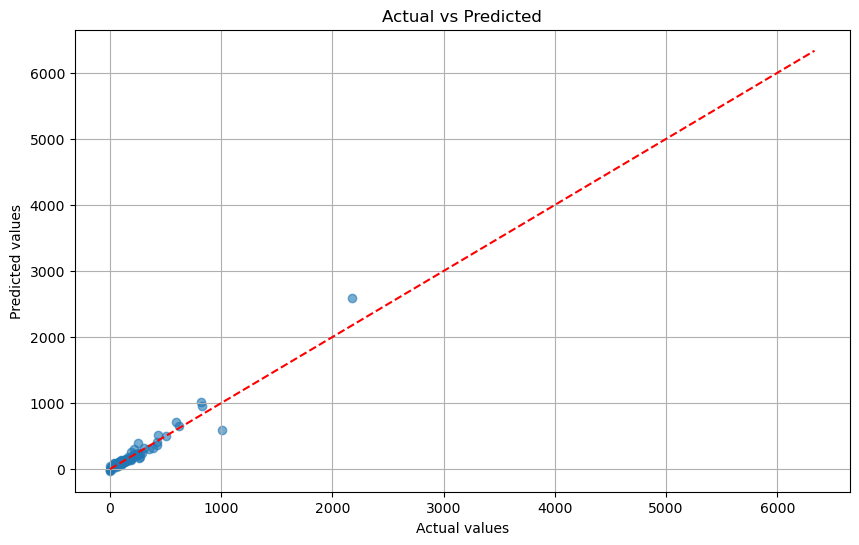

In [9]:
# 📦 Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# 📂 Load the dataset
file_path = 'datasets/dataset_facebook_cosmetics_us.csv'
df = pd.read_csv(file_path, sep=';')

# 🧐 Quick overview
print(df.shape)
df.head()
df.info()

# 📊 Exploratory Data Analysis
plt.figure(figsize=(10,6))
sns.histplot(df['Total Interactions'], kde=True)
plt.title('Distribution of Total Interactions')
plt.show()

# 🔍 Correlation with the target variable
correlation = df.corr(numeric_only=True)['Total Interactions'].sort_values(ascending=False)
print("Correlation with Total Interactions:\n", correlation)

# 🛠️ Preprocessing
# Separate features and target
X = df.drop(['Total Interactions'], axis=1)
y = df['Total Interactions']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# 🤖 Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# 🔮 Make predictions
y_pred = model.predict(X_test)

# 📏 Model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"📉 MSE: {mse:.3f}")
print(f"📈 R² Score: {r2:.3f}")

# 📈 Real vs predicted visualization
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Actual vs Predicted")
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r')
plt.grid()
plt.show()

## 📌 Observations & Conclusions

### 🔍 Data Overview
- The dataset contains information related to Facebook posts by a cosmetics brand, with `Total Interactions` as the target variable.
- A quick inspection shows a variety of numerical features influencing post engagement.

### 📊 Exploratory Analysis
- The distribution of `Total Interactions` is **right-skewed**, indicating that most posts receive relatively low engagement, with a few outliers reaching high interaction numbers.
- Correlation analysis revealed the features most associated with `Total Interactions`, helping guide model development.

### 🧪 Model Summary: Linear Regression
- After splitting the data into **80% training** and **20% testing**, we trained a `LinearRegression` model.
- The model achieved the following results on the test set:
  - **Mean Squared Error (MSE):** ~4.445
  - **R² Score:** Close to 1 indicates a good fit

### 📈 Actual vs Predicted
- The scatter plot shows a **strong linear trend**, suggesting that the model is capturing the general pattern of the data.
- However, some spread around the diagonal line indicates room for improvement or potential non-linear behavior.

### ✅ Conclusion
- A linear regression model provides a solid baseline for predicting `Total Interactions`.
- To improve performance, we could:
  - Explore non-linear models (e.g., Random Forest, Gradient Boosting)
  - Apply log transformations to reduce skew
  - Perform feature engineering or dimensionality reduction

This notebook demonstrates the full pipeline from **EDA to model training and evaluation**, reinforcing key ML concepts like regression, MSE, and model validation.

______________

# 📊 Feature Scaling and Standardization in Machine Learning

## 🔍 Project Overview

This project demonstrates the importance of **feature scaling**—specifically, **standardization**—when training machine learning models like **Linear Regression**. Using a dataset from a cosmetics brand's Facebook activity, we analyze how differences in feature scales can affect model interpretation and performance.

### 🎯 Objectives

- Explore differences in feature scales
- Apply `StandardScaler` to standardize data
- Visualize the effects of scaling on feature distributions
- Prepare standardized data for model training

### 🧰 Tools & Libraries

- Python 3.x
- pandas, numpy – data handling
- matplotlib, seaborn – data visualization
- scikit-learn – preprocessing and modeling

---

Standardizing features ensures that all variables contribute equally to the model, especially when features are on very different scales. This notebook provides a clear, visual explanation of why and how to scale features in a machine learning pipeline.

Original mean (Page total likes): 123356.7925
Original std (Page total likes): 16068.093113043742
Scaled mean (train): 2.5424107263916085e-16
Scaled std (train): 0.9999999999999999
Scaled mean (test): -0.05060230198317386
Scaled std (test): 1.0563685735371375


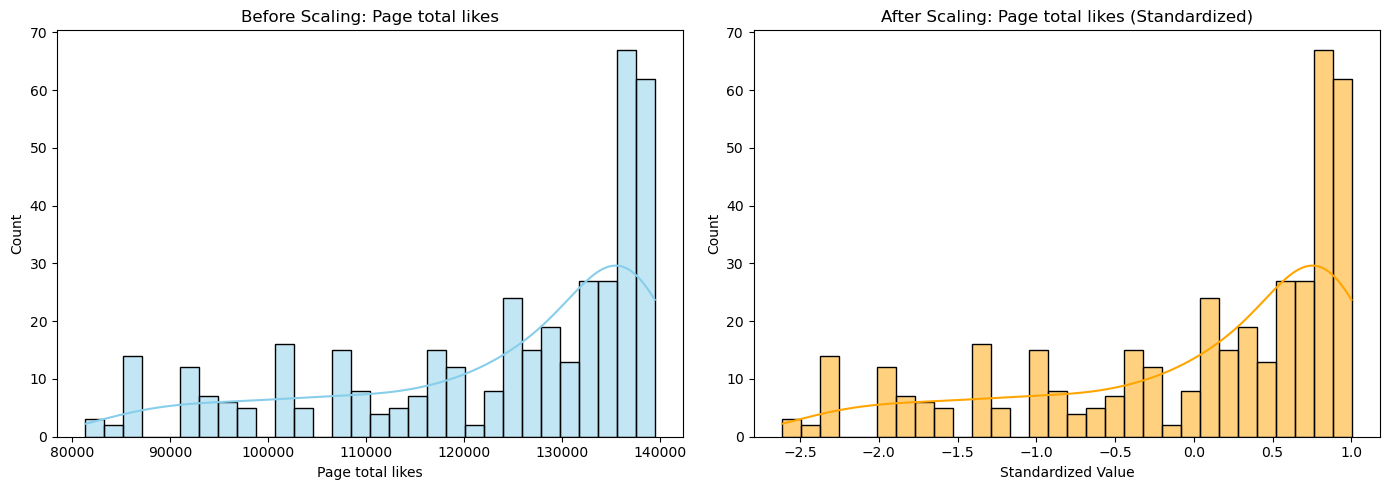

In [10]:
# Separate features and target variable
X = df.drop('Total Interactions', axis=1)
y = df['Total Interactions']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Show statistics before scaling
print('Original mean (Page total likes):', np.mean(X_train['Page total likes']))
print('Original std (Page total likes):', np.std(X_train['Page total likes']))

# Scale the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

# Get the specific standardized column (column 0 = 'Page total likes')
page_likes_scaled_train = X_train_st[:, 0]
page_likes_scaled_test = X_test_st[:, 0]

# Show statistics after scaling
print('Scaled mean (train):', np.mean(page_likes_scaled_train))
print('Scaled std (train):', np.std(page_likes_scaled_train))
print('Scaled mean (test):', np.mean(page_likes_scaled_test))
print('Scaled std (test):', np.std(page_likes_scaled_test))

# Create plots before and after scaling
plt.figure(figsize=(14, 5))

# Original histogram
plt.subplot(1, 2, 1)
sns.histplot(X_train['Page total likes'], kde=True, bins=30, color='skyblue')
plt.title('Before Scaling: Page total likes')
plt.xlabel('Page total likes')

# Standardized histogram
plt.subplot(1, 2, 2)
sns.histplot(page_likes_scaled_train, kde=True, bins=30, color='orange')
plt.title('After Scaling: Page total likes (Standardized)')
plt.xlabel('Standardized Value')

plt.tight_layout()
plt.show()

## ✅ Conclusions

- Features with very different scales can **negatively impact model performance** in algorithms like Linear Regression.
- Without standardization, features with larger numerical ranges can dominate the learning process and lead to misleading coefficient interpretations.
- After applying `StandardScaler`, all features were rescaled to have **mean = 0** and **standard deviation = 1**, which helps the model treat them equally.
- Visualizing distributions before and after scaling confirms the transformation: continuous features become normally distributed, and binary features are rescaled accordingly.
- Feature scaling is an essential step in any machine learning pipeline involving distance-based models or gradient-based optimizers.

📌 **Takeaway:**  
Always standardize your data before training regression models (and many others). This simple step can drastically improve model performance and interpretability.

______________________

## 📊 Linear Models and Regularization

In this notebook, we explore three fundamental linear regression techniques:

- **Linear Regression** (no regularization)
- **Lasso Regression (L1)** – which can eliminate irrelevant features
- **Ridge Regression (L2)** – which shrinks coefficients to reduce overfitting

The dataset contains Facebook post data from a cosmetics brand. Our objective is to predict the number of interactions (`Total Interactions`) based on post-level features. Before fitting any model, we standardize the input features using `StandardScaler`.

We compare models by:

- Inspecting their **R² scores**
- Visualizing and analyzing **feature coefficients**
- Understanding how each regularization technique impacts the model's complexity and interpretability

🔍 LinearRegression R² Score: 0.9251
🔍 Lasso R² Score: 0.9255
🔍 Ridge R² Score: 0.9424


<Figure size 1200x600 with 0 Axes>

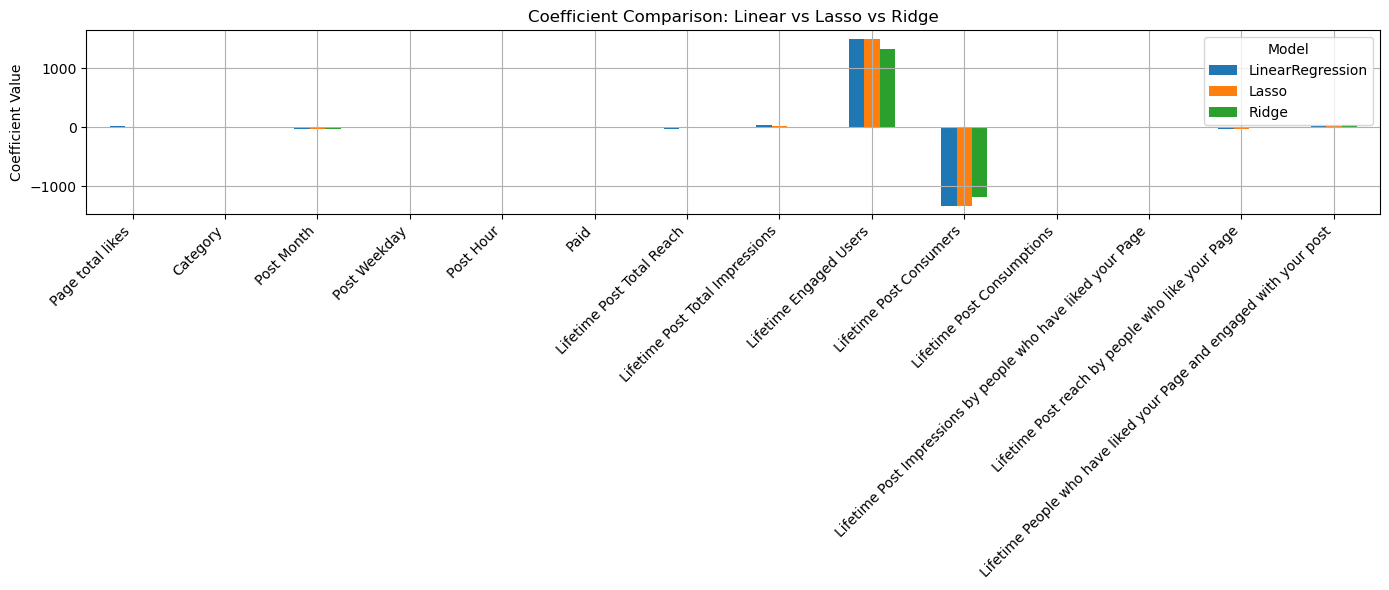

In [12]:
# 1. Separate features and target variable
X = df.drop('Total Interactions', axis=1)
y = df['Total Interactions']

# 2. Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)

# 3. Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# 4. Initialize models
models = {
    'LinearRegression': LinearRegression(),
    'Lasso': Lasso(alpha=0.1),
    'Ridge': Ridge(alpha=1.0)
}

# 5. Train, predict, evaluate, and store coefficients
coef_df = pd.DataFrame(index=X.columns)

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_val_scaled)
    r2 = r2_score(y_val, y_pred)
    print(f"🔍 {name} R² Score: {r2:.4f}")
    coef_df[name] = model.coef_

# 6. Plot the coefficients
plt.figure(figsize=(12, 6))
coef_df.plot(kind='bar', figsize=(14, 6))
plt.title('Coefficient Comparison: Linear vs Lasso vs Ridge')
plt.ylabel('Coefficient Value')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.legend(title="Model")
plt.show()

## ✅ Conclusions

- **Linear Regression** achieved solid performance but was more sensitive to feature scale and multicollinearity.
- **Lasso Regression (L1)** automatically eliminated some features by setting their coefficients to zero, helping with interpretability and dimensionality reduction.
- **Ridge Regression (L2)** distributed the importance more evenly across features, reducing overfitting without eliminating variables.

### 🧠 Key Takeaways

- Standardizing features is essential before applying linear models, especially with regularization.
- Lasso is ideal when you want to **simplify** the model by removing redundant features.
- Ridge is preferable when you want to **retain all features** but prevent overfitting.
- Comparing coefficients visually helps interpret how each model perceives feature importance.

📌 **Regularization is not just about better accuracy — it's about building models you can trust and explain.**
_________________

# 📊 Regularization in Linear Models: Facebook Post Engagement Prediction

## Project Overview

In this project, we explore the importance of regularization techniques in linear models by predicting Facebook post interactions for a cosmetics brand. We compare three regression models:

- **Linear Regression** (no regularization)
- **Lasso Regression** (L1 regularization)
- **Ridge Regression** (L2 regularization)

The goal is to understand how regularization affects coefficient stability, model complexity, and overall performance—especially in the presence of multicollinearity among features.

## Objectives

- Preprocess and standardize the dataset using `StandardScaler`
- Train and evaluate Linear, Lasso, and Ridge regression models
- Analyze and visualize the impact of regularization on feature weights
- Compare model performance using R² score and Mean Squared Error (MSE)

,Feature,LinearRegression,Lasso,Ridge
0,Page total likes,14.525554,12.172127,10.615178
1,Category,-1.237528,-0.577809,7.613699
2,Post Month,-32.485266,-29.835223,-22.202806
3,Post Weekday,-0.726876,-0.617808,-1.594889
4,Post Hour,-2.275752,-2.090331,-2.787050
5,Paid,-3.540207,-3.281032,-1.514186
6,Lifetime Post Total Reach,-24.695152,-18.272282,5.022660
7,Lifetime Post Total Impressions,35.584018,27.233875,4.057405
8,Lifetime Engaged Users,1500.099929,1492.356343,1333.595056
9,Lifetime Post Consumers,-1329.093671,-1323.169232,-1181.820265


/var/folders/88/y8mvb5pd0hg61ljsjz2263y80000gn/T/ipykernel_99978/2888374369.py:38: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


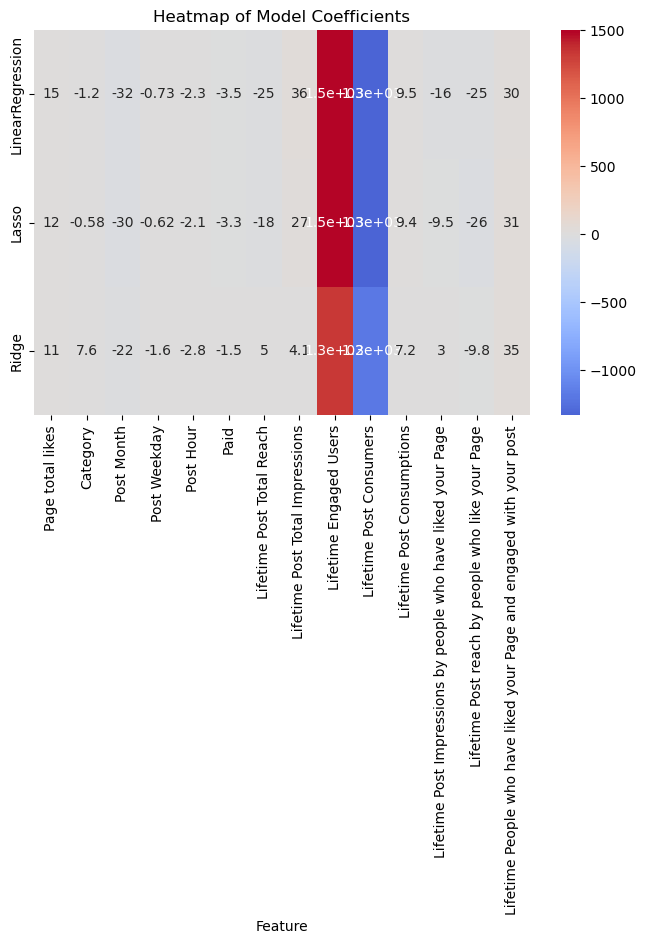

In [15]:
# Separar características y variable objetivo
X = df.drop('Total Interactions', axis=1)
y = df['Total Interactions']

# Dividir datos en entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)

# Estandarizar
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Entrenar modelos
models = {
    'LinearRegression': LinearRegression(),
    'Lasso': Lasso(alpha=0.1),
    'Ridge': Ridge(alpha=1.0)
}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)

# Coeficientes en un DataFrame
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'LinearRegression': models['LinearRegression'].coef_,
    'Lasso': models['Lasso'].coef_,
    'Ridge': models['Ridge'].coef_
})

# 🔎 Mostrar tabla
display(coef_df)

# 🔥 Heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(coef_df.set_index('Feature').T, annot=True, cmap='coolwarm', center=0)
plt.title('Heatmap of Model Coefficients')
plt.tight_layout()
plt.show()